In [2]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols,glm
import utils

# Data pre-processing
Combine two types of wine data into one dataset.

In [35]:
lines = []
with open('./datasets/kaggle-wine-quality-white.csv') as kaggle_white:
    with open('./datasets/uci-wine-quality-both.csv') as uci_wine:
        kaggle = csv.reader(kaggle_white)
        uci = csv.reader(uci_wine)
        with open('./datasets/uci-kaggle-wine.csv', 'w', newline='') as f:
            writer = csv.writer(f, quoting=csv.QUOTE_NONE, quotechar=None, escapechar='|', delimiter=',')
            for row in uci:
                if row in lines:
                    continue
                else:
                    writer.writerow(row)
                    lines.append(row)
            for row in kaggle:
                if row in lines:
                    continue
                else:
                    writer.writerow(row)
                    lines.append(row)

In [28]:
#将数据集读入到pandas数据框中
# wine=pd.read_csv('uci-wine-quality-both.csv',sep=',',header=0)
wine=pd.read_csv('./datasets/uci-kaggle-wine.csv',sep=',',header=0)
#列名重命名，用下划线替换空格，使之符合python命名规范
wine.columns=wine.columns.str.replace(' ','_')
print(wine.head())
print('------------')
#显示所有变量的描述性统计量
#这些统计量包括总数、均值、标准差、最小值、第25个百分位数、中位数、第75个百分位数和最大值
print(wine.describe())
print('------------')
#找出唯一值
print(sorted(wine.quality.unique()))
print('------------')
#计算值的频率
print(wine.quality.value_counts())

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  Red            7.4              0.70         0.00             1.9   
1  Red            7.8              0.88         0.00             2.6   
2  Red            7.8              0.76         0.04             2.3   
3  Red           11.2              0.28         0.56             1.9   
4  Red            7.4              0.66         0.00             1.8   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.075                 13.0                  40.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

                type 
quality  count  Red      1359.000000
                White    7916.000000
         mean   Red         5.623252
                White       5.854725
         std    Red         0.823578
                White       0.890813
         min    Red         3.000000
                White       3.000000
         25%    Red         5.000000
                White       5.000000
         50%    Red         6.000000
                White       6.000000
         75%    Red         6.000000
                White       6.000000
         max    Red         8.000000
                White       9.000000
dtype: float64
---------
     quality      
type     Red White
0.25     5.0   5.0
0.75     6.0   6.0
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


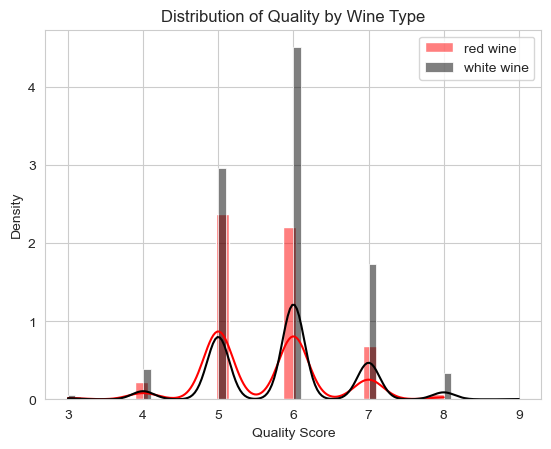

In [29]:
#按照葡萄酒类型显示质量的描述性统计量
print(wine.groupby('type')[['quality']].describe().unstack('type'))
print('---------')
#按照葡萄酒类型显示质量的特定分位数值
print(wine.groupby('type')[['quality']].quantile([0.25,0.75]).unstack('type'))
utils.plt_show('both', wine)

# Student's t test
To check whether there is difference between the qualities of red wine and white wine, here using hypothesis testing methods. Using Student's t test to define the difference between two wines' average quality scores. Via implementing pooled variance, we can know whether the standard deviation of scores of two types of wines is different.
We make the original hypothesis be like: the average of two wines is same.

In [30]:
print(wine.groupby(['type'])[['quality']].agg(['std']))
red_wine = wine.loc[wine['type'] == 'Red', 'quality']
white_wine = wine.loc[wine['type'] == 'White', 'quality']
t_stat,p_value,df=sm.stats.ttest_ind(red_wine,white_wine)
print('t_stat: %.3f p_value: %.4f' % (t_stat,p_value))

        quality
            std
type           
Red    0.823578
White  0.890813
t_stat: -8.945 p_value: 0.0000


Given to the results, we can find that p value is less than 0.0005, which means the original hypothesis is wrong. Thus, there is quite difference between red wine quality and white wine quality. And also according to the standard values, white wine has better quality than red wine.

# Relations and relatives between variables by pairs

C:\Users\Stone\AppData\Local\Temp\ipykernel_11844\1741458388.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(wine.corr())


                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.188971     0.305680   
volatile_acidity           0.188971          1.000000    -0.324603   
citric_acid                0.305680         -0.324603     1.000000   
residual_sugar            -0.052502         -0.091746     0.133289   
chlorides                  0.248107          0.329692     0.065959   
free_sulfur_dioxide       -0.223538         -0.287779     0.122299   
total_sulfur_dioxide      -0.242657         -0.303615     0.179817   
density                    0.414167          0.246340     0.110591   
pH                        -0.297206          0.170515    -0.287976   
sulphates                  0.236610          0.190314     0.046540   
alcohol                   -0.104516         -0.031796    -0.031749   
quality                   -0.096986         -0.236692     0.064226   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

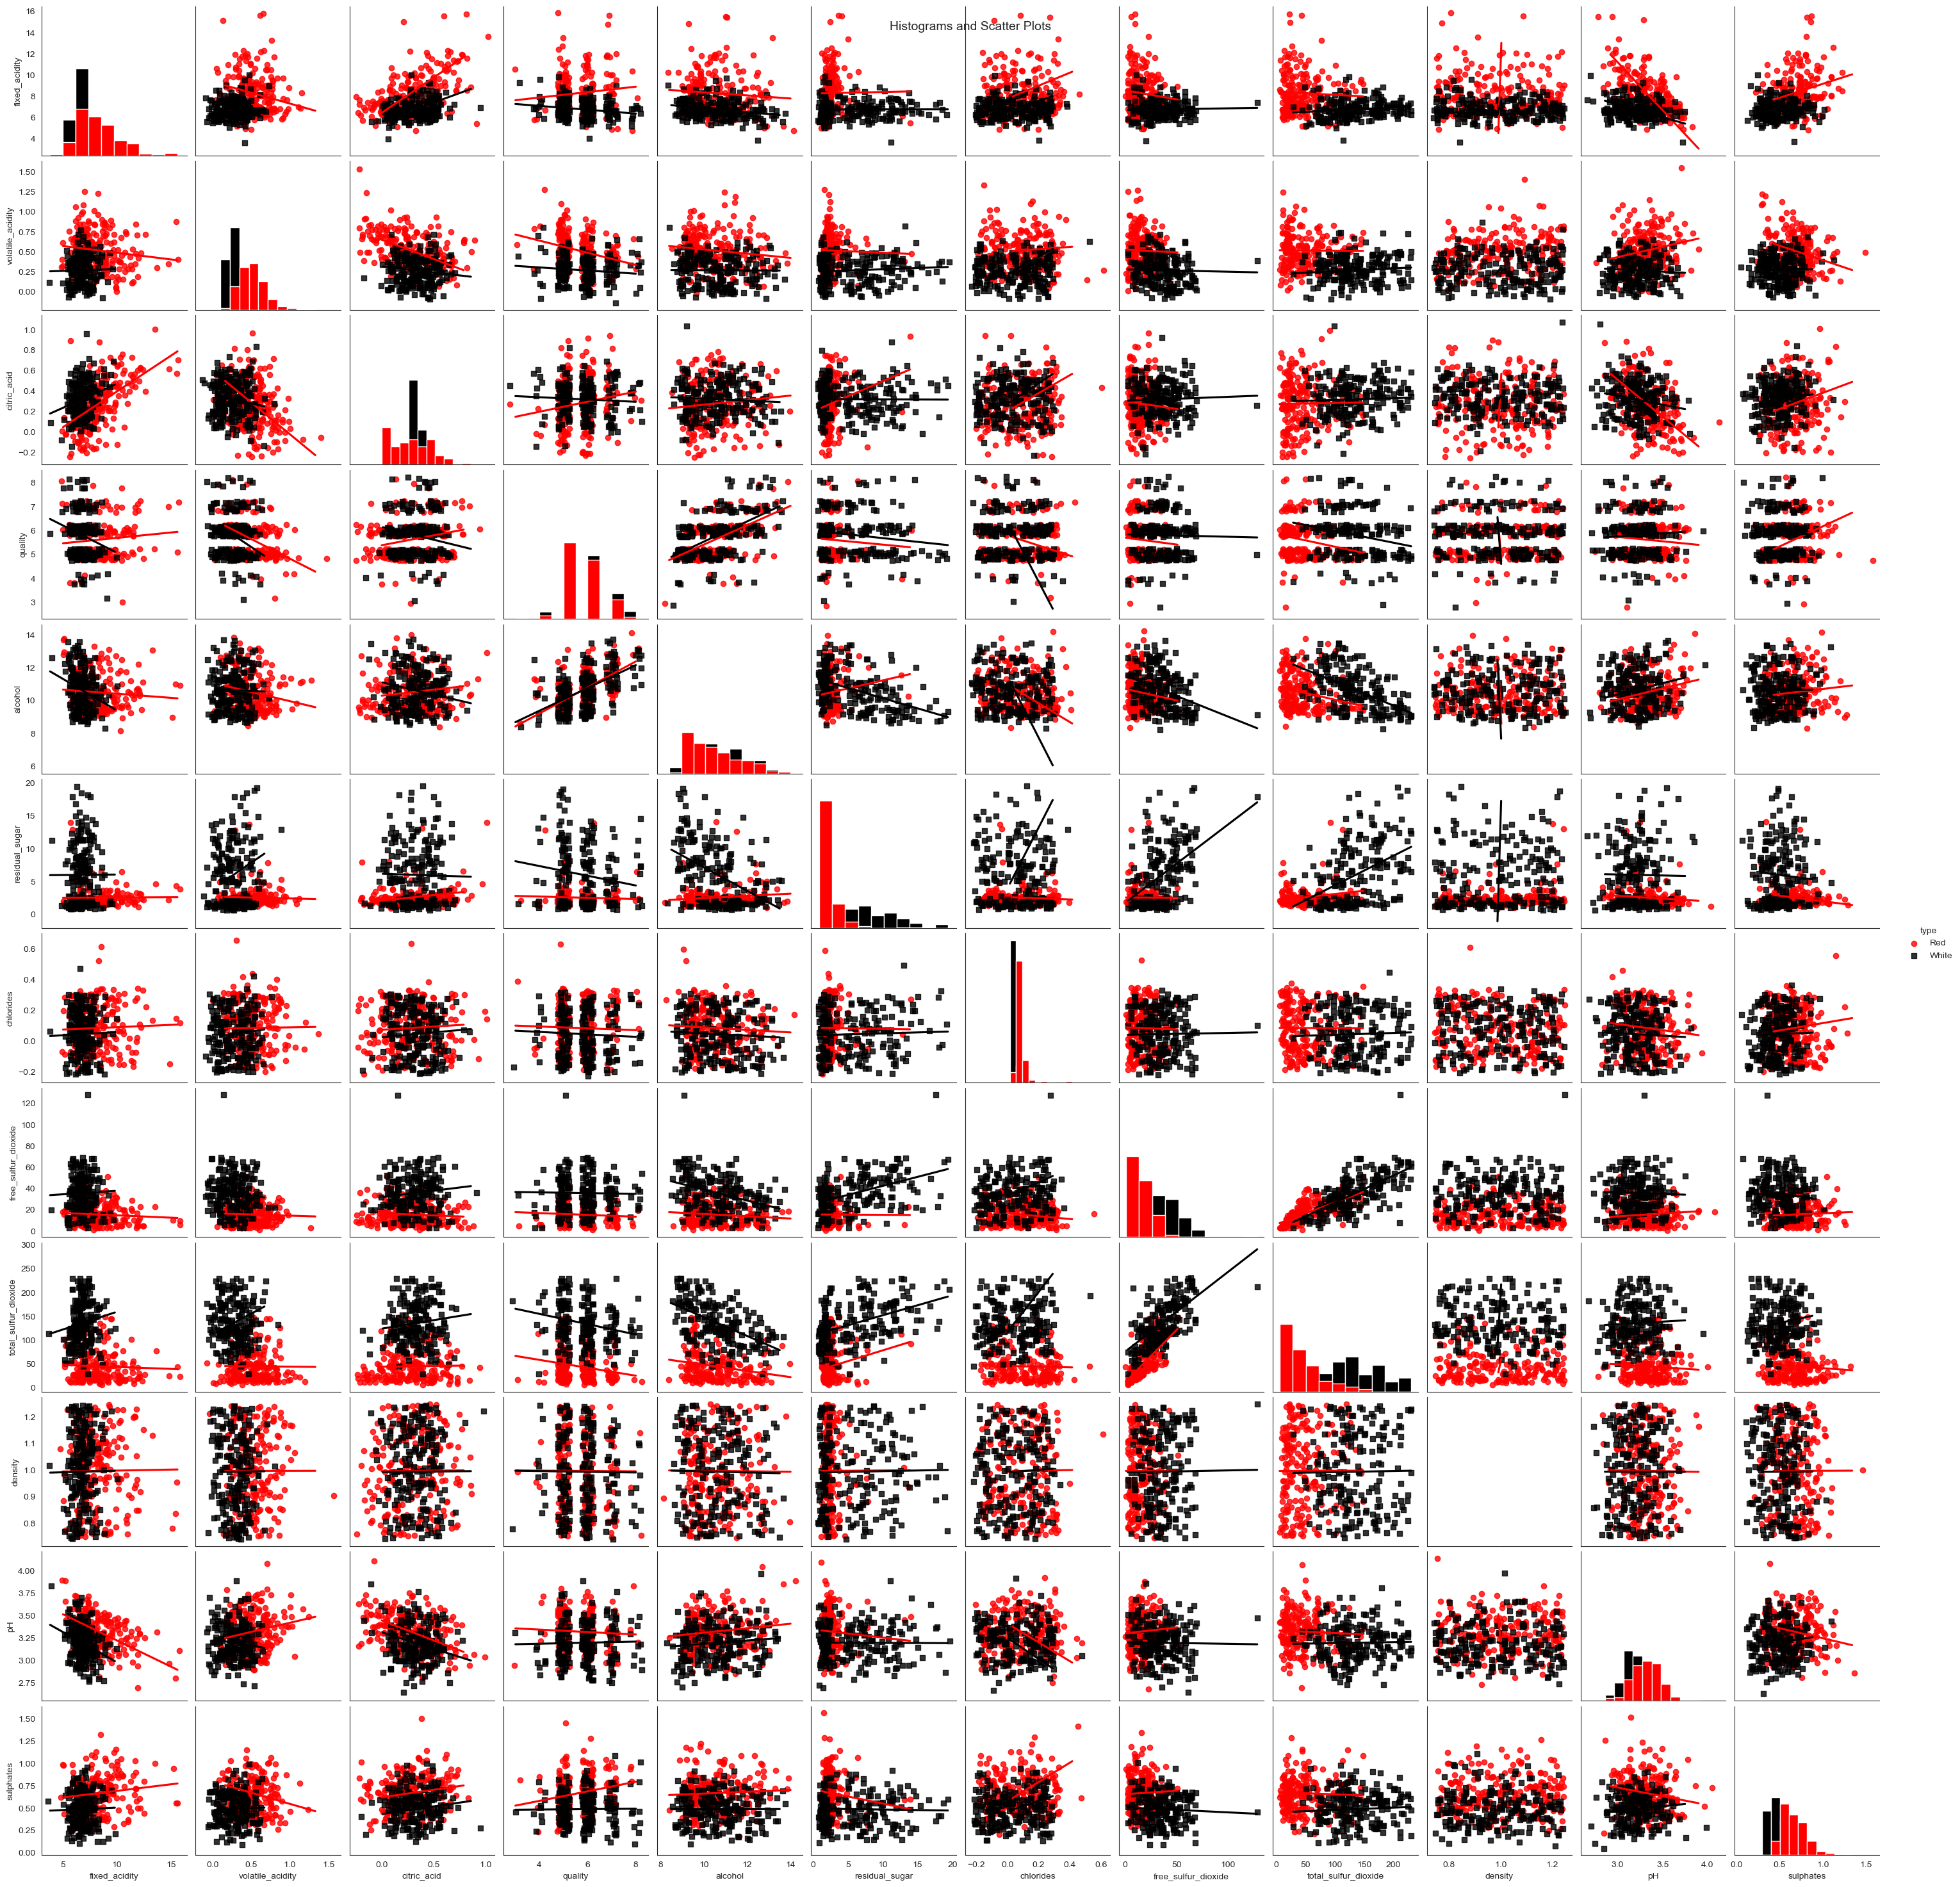

In [31]:
#计算所有变量的相关矩阵
print(wine.corr())
#从红葡萄酒和白葡萄酒的数据中取出一个“小”样本进行绘图
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]
reds_sample=take_sample(wine.loc[wine['type']=='Red',:])
whites_sample=take_sample(wine.loc[wine['type']=='White',:])
wine_sample=pd.concat([reds_sample, whites_sample])
wine['in_sample']=np.where(wine.index.isin(wine_sample.index), 1., 0.)
print(pd.crosstab(wine.in_sample, wine.type, margins=True))
#查看成对变量之间的关系
sns.set_style("white")
g=sns.pairplot(wine_sample, kind='reg', plot_kws={"ci":False,
                                                "x_jitter":0.25,"y_jitter":0.25}, hue='type', diag_kind='hist',
               diag_kws={"bins":10,"alpha":1.0}, palette=dict(Red="red", White="black"),
               markers=["o","s"], vars=['fixed_acidity','volatile_acidity','citric_acid','quality','alcohol','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates'])
print(g)
plt.suptitle('Histograms and Scatter Plots', fontsize=14)
plt.show()

# Using the least square estimation to do logistic regression
Relatives between each two variables and the figure can make it available to judge the relations between each two variables. But we still cannot get the coefficients of each parameter in final result formula. Thus, we use the least square estimation method to get each coefficient.
According to logistic regression model:
$$
y_i = N(\mu_i, \sigma^2) \\
\mu_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip}
$$
Here i counts from 1 to n, which n is n records. P means there are p variables, here it should be 11.
We use package statmodel to do logistic regression.

In [32]:
dependent_variable = wine['quality']
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)

In [38]:
my_formula='quality~alcohol+chlorides+citric_acid+density+fixed_acidity+free_sulfur_dioxide+pH+residual_sugar+sulphates+total_sulfur_dioxide+volatile_acidity'
lm=ols(my_formula,data=wine_standardized).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     361.0
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:56:59   Log-Likelihood:                -10373.
No. Observations:                9275   AIC:                         2.077e+04
Df Residuals:                    9263   BIC:                         2.086e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8208 

# Check accuracy of LR

In [40]:
print("\nQuantities you can extract from the result:\n%s"%dir(lm))
print('==============================================================================')
print("\nCoefficients:\n%s"%lm.params)
print('==============================================================================')
print("\nCoefficient Std Errors:\n%s"%lm.bse)
print('==============================================================================')
print("\nAdj.R-squared\n%.2f"%lm.rsquared_adj)
print('==============================================================================')
print("\nF-statistic:%.1f Pvalue:%.2f"%(lm.fvalue,lm.f_pvalue))
print('==============================================================================')
print("\nNumber of obs:%d Number of fitted values:%d"%(lm.nobs, len(lm.fittedvalues)))


Quantities you can extract from the result:
['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initialize', 